In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')


modules loaded


In [20]:
import os
import random
import shutil

# Define directories
data_dir = r'C:\Users\MANAN\OneDrive\Documents\mango'  # Path to the directory containing class folders
train_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\train'
val_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\validation'
test_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\test'

# Create directories for train, validation, and test data
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the percentage of data for train, validation, and test
train_split = 0.70
val_split = 0.20
test_split = 0.10

# Loop through each class folder
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        # Split the images into train, validation, and test sets
        train_count = int(len(images) * train_split)
        val_count = int(len(images) * val_split)
        test_count = len(images) - train_count - val_count

        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        # Move images to corresponding directories
        for img_name in train_images:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(train_dir, class_folder)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

        for img_name in val_images:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(val_dir, class_folder)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

        for img_name in test_images:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(test_dir, class_folder)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\train'
test_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\test'
val_dir = r'C:\Users\MANAN\OneDrive\Documents\mango1\validation'


# Define data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Define target image size
target_size = (224, 224)  # Adjust according to your model's input size

# Define class mode
class_mode = 'categorical'  # Assuming you have multiple classes

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode
)


Found 2800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [5]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the base model
base_model.trainable = False

# Add custom head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [6]:
history = model.fit(
    train_generator,
    epochs=7,
    validation_data=val_generator
)


Epoch 1/7


88/88 [==============================] - 287s 3s/step - loss: 1.4554 - accuracy: 0.4893 - val_loss: 0.5317 - val_accuracy: 0.8462
Epoch 2/7
88/88 [==============================] - 283s 3s/step - loss: 0.6623 - accuracy: 0.7657 - val_loss: 0.3253 - val_accuracy: 0.8913
Epoch 3/7
88/88 [==============================] - 287s 3s/step - loss: 0.4815 - accuracy: 0.8314 - val_loss: 0.2013 - val_accuracy: 0.9362
Epoch 4/7
88/88 [==============================] - 287s 3s/step - loss: 0.3913 - accuracy: 0.8700 - val_loss: 0.2508 - val_accuracy: 0.9212
Epoch 5/7
88/88 [==============================] - 287s 3s/step - loss: 0.3546 - accuracy: 0.8896 - val_loss: 0.1333 - val_accuracy: 0.9563
Epoch 6/7
88/88 [==============================] - 286s 3s/step - loss: 0.3465 - accuracy: 0.8836 - val_loss: 0.1527 - val_accuracy: 0.9463
Epoch 7/7
88/88 [==============================] - 292s 3s/step - loss: 0.2808 - accuracy: 0.9075 - val_loss: 0.1864 - val_accuracy: 0.9413


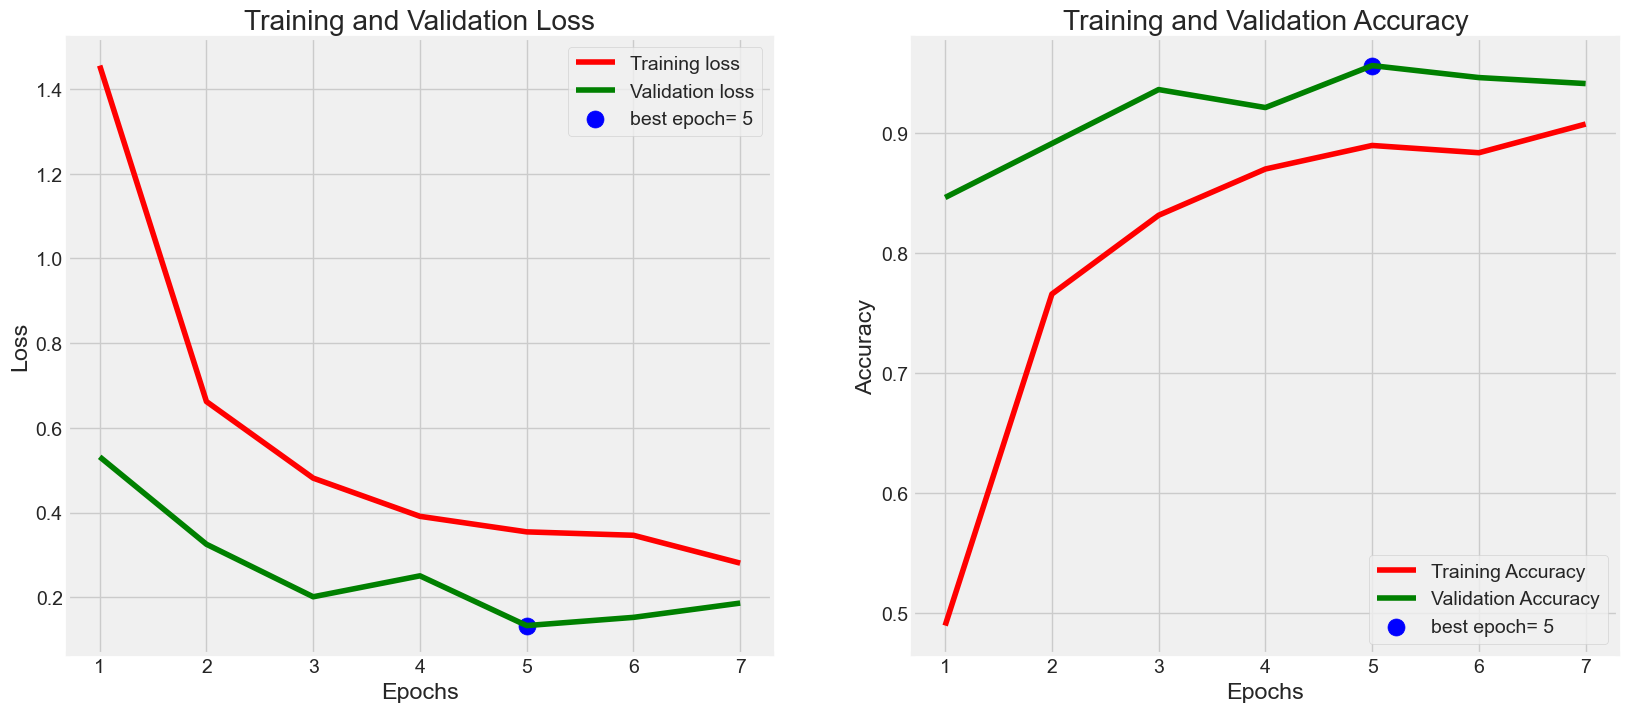

In [7]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [9]:
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

88/88 [==============================] - 224s 3s/step - loss: 0.1423 - accuracy: 0.9539
Train Loss: 0.1423306167125702
Train Accuracy: 0.9539285898208618
25/25 [==============================] - 60s 2s/step - loss: 0.1864 - accuracy: 0.9413
Validation Loss: 0.18643510341644287
Validation Accuracy: 0.9412500262260437
13/13 [==============================] - 30s 2s/step - loss: 0.1502 - accuracy: 0.9525
Test Loss: 0.15016795694828033
Test Accuracy: 0.9524999856948853


13/13 [==============================] - 30s 2s/step


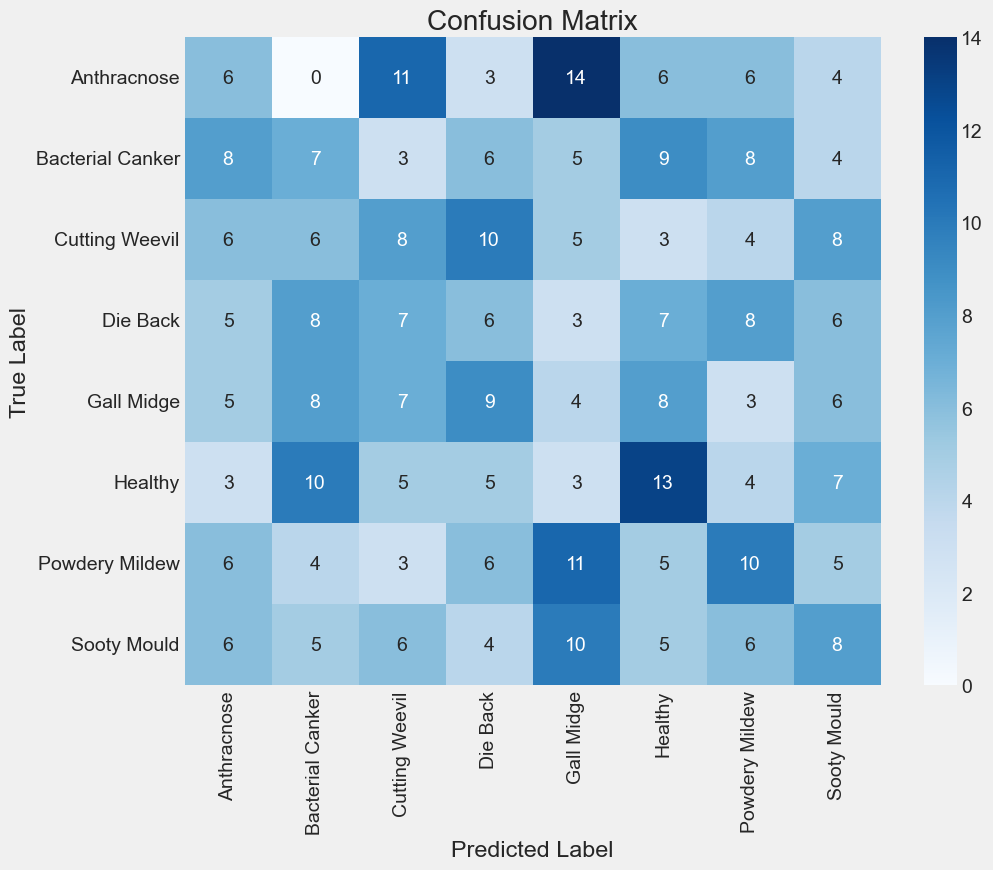

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions for the test set
test_predictions = model.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels for the test set
test_true_labels = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [12]:
model.save('incmangomodel.h5')